<a href="https://colab.research.google.com/github/swapnil-23/BTECH_ML_FINALYR/blob/main/ML_FinalYr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install jinja2
!pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
      Successfully uninstalled MarkupSafe-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.3.7 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 102.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.0 MB/s eta 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px
import plotly.graph_objs as go

import jinja2
from sklearn.model_selection import train_test_split
from pycaret.regression import *

In [4]:
## importing the ticker
# Take user input for equity symbol
# Take user input for equity symbol
symbol = input('Enter your choice of equity portfolio: ')

# Take user input for start and end dates
start_date = input('Enter the start date (YYYY-MM-DD): ')
end_date = input('Enter the end date (YYYY-MM-DD): ')

# Download stock data using yfinance
df = yf.download(symbol, start=start_date, end=end_date)

# Reset index and convert 'Date' to datetime
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])


Enter your choice of equity portfolio: TSLA
Enter the start date (YYYY-MM-DD): 2022-04-23
Enter the end date (YYYY-MM-DD): 2023-04-23
[*********************100%%**********************]  1 of 1 completed


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
data = df.copy()

# storing the feature attributes in the X array and adding a target column
X = np.array(data[['Date', 'Open', 'Close']])

## storing the closing values in the y
y = data['Close'].values

## splitting the dataset into 85% training and 15% testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15, random_state = 0, shuffle = False)

In [7]:
## getting the train and transforming it into dataframe

train_data = pd.DataFrame(X_train, columns = ['Date', 'Open', 'Close'])
train_data.head(5)

,Date,Open,Close
0,2022-04-25,326.323334,332.67334
1,2022-04-26,331.809998,292.140015
2,2022-04-27,299.526672,293.83667
3,2022-04-28,299.993347,292.503326
4,2022-04-29,300.75,290.253326


In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-25,326.323334,336.206665,325.100006,332.673340,332.673340,68341200
1,2022-04-26,331.809998,333.333344,291.666656,292.140015,292.140015,136133700
2,2022-04-27,299.526672,306.000000,292.453339,293.836670,293.836670,76956300
3,2022-04-28,299.993347,300.000000,273.899994,292.503326,292.503326,124948500
4,2022-04-29,300.750000,311.466675,290.000000,290.253326,290.253326,88133100
...,...,...,...,...,...,...,...
245,2023-04-17,186.320007,189.690002,182.690002,187.039993,187.039993,116662200
246,2023-04-18,187.149994,187.690002,183.580002,184.309998,184.309998,92067000
247,2023-04-19,179.100006,183.500000,177.649994,180.589996,180.589996,125732700
248,2023-04-20,166.169998,169.699997,160.559998,162.990005,162.990005,210970800


In [9]:
# Initialize pycaret setup
setUp = setup(data=df, target='Close', session_id=123, use_gpu=True)

# Train linear regression model
lr_model = create_model('lr')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,123
1,Target,Close
2,Target type,Regression
3,Original data shape,"(250, 7)"
4,Transformed data shape,"(250, 9)"
5,Transformed train set shape,"(175, 9)"
6,Transformed test set shape,"(75, 9)"
7,Numeric features,5
8,Date features,1
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

VISUALIZATIONS

In [20]:
## visualizations
import nbformat
fig = px.line(df, x = df['Date'], y = df['Open'], title='Open price of the given stock')
fig.show()

In [28]:
## closing price

fig = px.line(df, x = df['Date'], y = df['Close'], title="Closing price of the given stock")
fig

In [27]:
## making the candle stick chart for the given ticker symbol
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open = df['Open'],
                high = df['High'],
                low = df['Low'],
                close = df['Close'])])
fig.show()

FINANCIAL INDICATORS

In [23]:
window = 50

ts = df['Close']

ts_moving_avg = ts.rolling(window=window).mean()

ts_moving_avg


## calculating the 50 days moving average of the given ticker

df['Price'] = df['SMA_50'] = df['Close'].rolling(window=50).mean()
fig = px.line(df, x = df['Date'], y = df['Price'], title='50-day SMA', labels={"50-dat SMA"})
fig.update_traces(line = dict(color='green'))
fig.show()

In [24]:
## calculating the 200 day moving average
## calculating the 50 days moving average of the given ticker

df['Price'] = df['SMA_200'] = df['Close'].rolling(window=200).mean()
fig = px.line(df, x = df['Date'], y = df['Price'], title='200-day SMA', labels={"50-dat SMA"})
fig.update_traces(line = dict(color='green'))
fig.show()

In [25]:
## plotting the EXPONENTIAL MOVING AVERAGE GRAPH(EMA)

## the adjust is kept as 'false' in order to calculate the fixed number of periods regardless of any missing values

df['Price'] = df['EMA_50'] = df['Close'].ewm(span=50, adjust = False).mean()
fig = px.line(df, x = df['Date'], y = df['Price'], title='50-day EMA', labels={"50-dat EMA"})
fig.update_traces(line = dict(color='red'))
fig.show()

In [10]:
## implementing the LSTM model for the given equity
import tensorflow as tf
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [11]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

238

In [12]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.        ],
       [0.81950963],
       [0.82706465],
       [0.82112742],
       [0.81110842],
       [0.85887315],
       [0.86823905],
       [0.93261297],
       [0.81484883],
       [0.80352364],
       [0.68694706],
       [0.706139  ],
       [0.60811614],
       [0.59921036],
       [0.66094221],
       [0.59382234],
       [0.64909751],
       [0.57221099],
       [0.57163209],
       [0.50406697],
       [0.52039419],
       [0.45101825],
       [0.49649708],
       [0.56912367],
       [0.64615866],
       [0.64412511],
       [0.61757105],
       [0.6689723 ],
       [0.56291928],
       [0.579677  ],
       [0.58237845],
       [0.59564804],
       [0.58602978],
       [0.55273701],
       [0.47929405],
       [0.50224127],
       [0.55616575],
       [0.4675533 ],
       [0.48385082],
       [0.57414058],
       [0.56991035],
       [0.56538326],
       [0.61274711],
       [0.60924417],
       [0.5546666 ],
       [0.53608325],
       [0.51819743],
       [0.530

In [13]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([1.        , 0.81950963, 0.82706465, 0.82112742, 0.81110842,
       0.85887315, 0.86823905, 0.93261297, 0.81484883, 0.80352364,
       0.68694706, 0.706139  , 0.60811614, 0.59921036, 0.66094221,
       0.59382234, 0.64909751, 0.57221099, 0.57163209, 0.50406697,
       0.52039419, 0.45101825, 0.49649708, 0.56912367, 0.64615866,
       0.64412511, 0.61757105, 0.6689723 , 0.56291928, 0.579677  ,
       0.58237845, 0.59564804, 0.58602978, 0.55273701, 0.47929405,
       0.50224127, 0.55616575, 0.4675533 , 0.48385082, 0.57414058,
       0.56991035, 0.56538326, 0.61274711, 0.60924417, 0.5546666 ,
       0.53608325, 0.51819743, 0.53062103, 0.55646261, 0.55052545,
       0.60756693, 0.6352639 , 0.56214749, 0.55647749, 0.57415539,
       0.57982546, 0.58763283, 0.58977019, 0.61196044, 0.62073263])]
[0.7285222082333385]

[array([1.        , 0.81950963, 0.82706465, 0.82112742, 0.81110842,
       0.85887315, 0.86823905, 0.93261297, 0.81484883, 0.80352364,
       0.68694706, 0.706139  , 0.608

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=30)

Epoch 1/30
178/178 [==============================] - 8s 32ms/step - loss: 0.0185
Epoch 2/30
178/178 [==============================] - 5s 30ms/step - loss: 0.0063
Epoch 3/30
178/178 [==============================] - 6s 33ms/step - loss: 0.0045
Epoch 4/30
178/178 [==============================] - 3s 18ms/step - loss: 0.0053
Epoch 5/30
178/178 [==============================] - 5s 27ms/step - loss: 0.0046
Epoch 6/30
178/178 [==============================] - 4s 25ms/step - loss: 0.0033
Epoch 7/30
178/178 [==============================] - 4s 20ms/step - loss: 0.0028
Epoch 8/30
178/178 [==============================] - 3s 18ms/step - loss: 0.0031
Epoch 9/30
178/178 [==============================] - 3s 18ms/step - loss: 0.0026
Epoch 10/30
178/178 [==============================] - 5s 27ms/step - loss: 0.0027
Epoch 11/30
178/178 [==============================] - 4s 21ms/step - loss: 0.0026
Epoch 12/30
178/178 [==============================] - 3s 19ms/step - loss: 0.0024
Epoch 13/30
1

In [15]:
# Create the testing data set
# Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 608ms/step


6.512150604460281

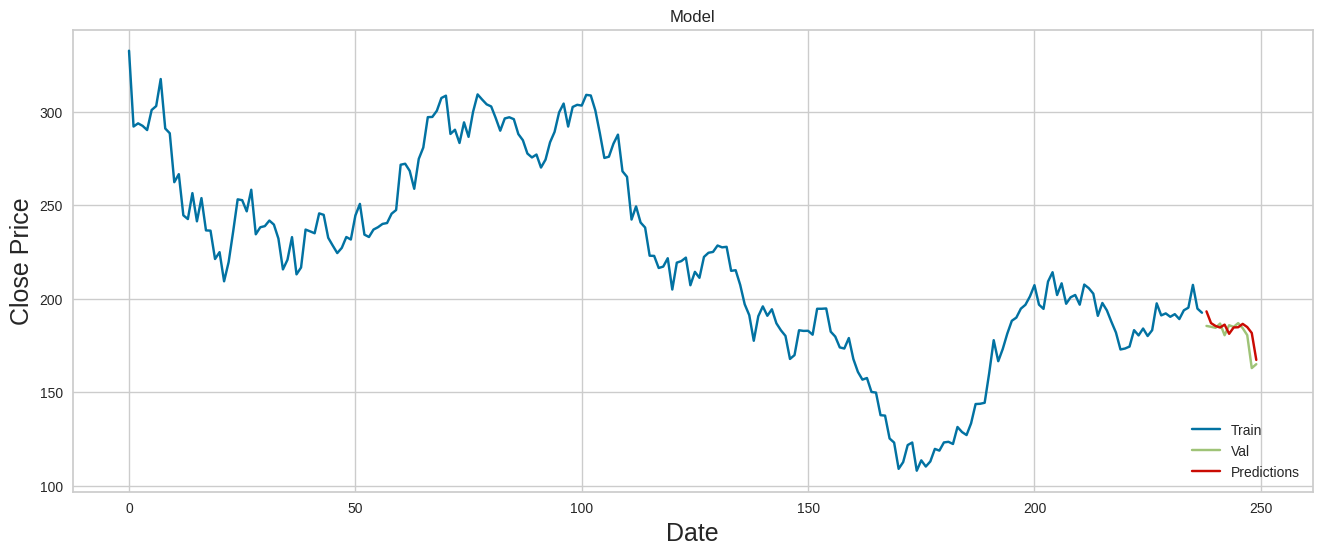

In [16]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [17]:
# Show the valid and predicted prices
valid.head()

,Close,Predictions
238,185.520004,193.299164
239,185.059998,187.049042
240,184.509995,185.490799
241,186.789993,184.663589
242,180.539993,186.211258
